<a href="https://colab.research.google.com/github/3x10e8/jupyter-experiments/blob/master/FrequencyModulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from numpy import sin, pi
from scipy import signal
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 4]

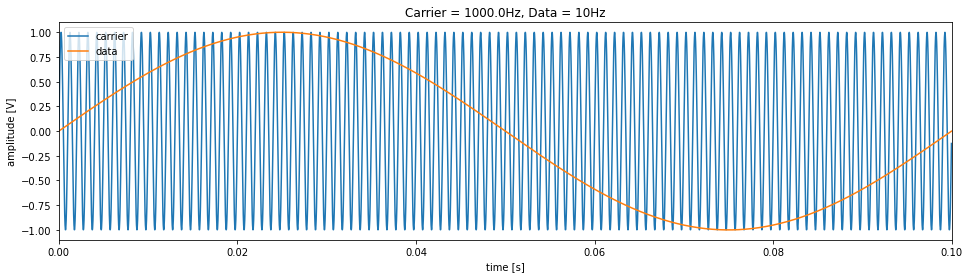

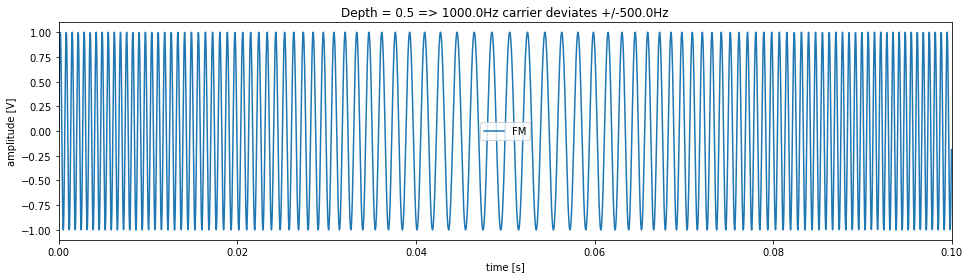

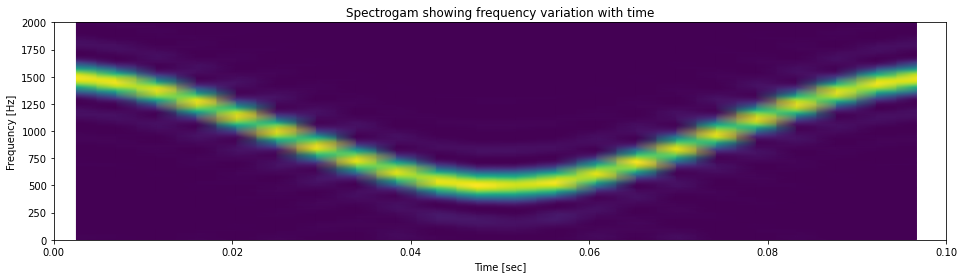

In [55]:
f0_Hz = 1e3 # this is our carrier frequency
fm_Hz = 10  # this is the frequency we'd modulate with: this is the actual "signal" that will ride the carrier 
fs = 50e3   # this is the data rate just for plotting these "analog" functions
depth = 0.5 # depth*f0 is the max freq deviation we want in the FM signal

# Generate a time vector from 0 to 100ms at 1/fs time steps
tt = np.arange(0, 1, 1/fs)

# Waveforms
carrier = sin(2*pi* f0_Hz *tt)
data = sin(2*pi* fm_Hz *tt)
f_dev_max = depth*f0_Hz # deviation in carrier freq
fm_dev_ratio = f_dev_max/fm_Hz
# https://www.electronics-notes.com/articles/radio/modulation/fm-frequency-modulation-index-deviation-ratio.php

# Combining
fm_carrier = sin(2*pi*f0_Hz*tt + fm_dev_ratio*data) # how does this work?

# Plotting
plot_duration = 0.1 # truncate plots for visibility
tend = int(fs*plot_duration) # last index to plot

plt.figure(1)
plt.plot(tt[:tend], carrier[:tend], label='carrier')
plt.plot(tt[:tend], music[:tend], label='data')
plt.title('Carrier = {}Hz, Data = {}Hz'.format(f0_Hz, fm_Hz))
plt.legend()
plt.xlabel('time [s]')
plt.ylabel('amplitude [V]')
plt.xlim([0, plot_duration])

plt.figure(2)
plt.plot(tt[:tend], fm_carrier[:tend], label='FM')
plt.legend()
plt.title('Depth = {} => {}Hz carrier deviates +/-{}Hz'.format(
    depth, f0_Hz, f_dev_max))

plt.xlabel('time [s]')
plt.ylabel('amplitude [V]')
plt.xlim([0, plot_duration])

f, t, Sxx = signal.spectrogram(fm_carrier[:tend], fs, nfft=tend)
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html

plt.figure(3)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.xlim([0, plot_duration])
plt.ylim([0, 2000])
plt.title('Spectrogam showing frequency variation with time')
plt.show()